In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [4]:
torch.__version__

'2.6.0'

In [9]:
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)

y = weight * X  + bias

In [11]:
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [12]:
len(X), len(y)

(50, 50)

In [17]:
# create the split of 40 per and 10 per
train_size = int(0.8 * len(X))
train_size

X_train , y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


In [26]:
# Visulaize

def plot_predition(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,predition=None):
    plt.scatter(X_train,y_train,c="g", label="Training")
    
    plt.scatter(X_test, y_test, c="r", label="Test data")
    
    if predition is not None:
        plt.scatter(X_test, predition, c="y", label= "Preds" )
        
    plt.legend()

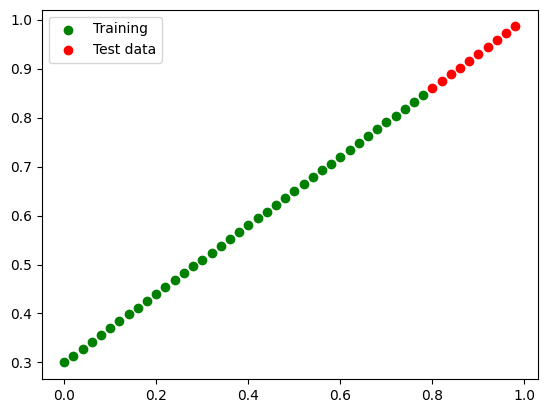

In [27]:
plot_predition()

In [32]:
torch.rand(1)

tensor([0.2200])

In [35]:
torch.randn(1)

tensor([-1.0985])

In [38]:
from torch import nn
class LinearRegression(nn.Module):
    def __init__(self):
        super.__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        
    #forward pass
    
    def forward(self,x: torch.Tensor) -> torch.Tensor : 
        # w*x +b 
        return self.weights * x + self.bias
        